Plot climate_var data over Germany. 

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.util as cutil
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from netCDF4 import Dataset

Set spatial and temporal extend.

In [23]:
timesteps = 1
start_lon = 0
end_lon = 1440
start_lat = 0
end_lat = 721

In [24]:
# get all data sources
import os

folder_path = "./input"
print(os.listdir(folder_path))
files = [
    {"name": "ssp1-1.9", "path": ".\input\SSP1-1.9_adaptor.esgf_wps.retrieve-1683660431.0402071-3857-21-ea2837a2-cb74-412f-a840-b5ac29c5a2cb\sfcWind_Amon_IPSL-CM6A-LR_ssp119_r1i1p1f1_gr_21000716-21000716_v20190410.nc"},
    {"name": "ssp1-2.6", "path": ".\input\SSP1-2.6_adaptor.esgf_wps.retrieve-1683659990.4880607-28422-18-9acc182d-6dfc-4d5f-b53d-be7279c7ca85\sfcWind_Amon_IPSL-CM6A-LR_ssp126_r1i1p1f1_gr_21000716-21000716_v20190903.nc"},
    {"name": "ssp2-4.5", "path": ".\input\SSP2-4.5_adaptor.esgf_wps.retrieve-1683660094.8976068-21149-15-4a4e7245-153c-449b-af18-7ed35c8c02f0\sfcWind_Amon_IPSL-CM6A-LR_ssp245_r1i1p1f1_gr_21000716-21000716_v20190119.nc"},
    {"name": "ssp3-7.0", "path": ".\input\SSP3-7.0_adaptor.esgf_wps.retrieve-1683660504.7495391-16189-17-8907b920-c51b-4c3c-b5fd-aa341384af2a\sfcWind_Amon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_21000716-21000716_v20190119.nc"},
    {"name": "ssp5-8.5", "path": ".\input\SSP5-8.5_adaptor.esgf_wps.retrieve-1683660597.0922666-22297-12-300eaae1-c68f-46d6-bc80-5b86d9c03a73\sfcWind_Amon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gr_21000716-21000716_v20190903.nc"},
]

['SSP1-1.9_adaptor.esgf_wps.retrieve-1683660431.0402071-3857-21-ea2837a2-cb74-412f-a840-b5ac29c5a2cb', 'SSP1-2.6_adaptor.esgf_wps.retrieve-1683659990.4880607-28422-18-9acc182d-6dfc-4d5f-b53d-be7279c7ca85', 'SSP2-4.5_adaptor.esgf_wps.retrieve-1683660094.8976068-21149-15-4a4e7245-153c-449b-af18-7ed35c8c02f0', 'SSP3-7.0_adaptor.esgf_wps.retrieve-1683660504.7495391-16189-17-8907b920-c51b-4c3c-b5fd-aa341384af2a', 'SSP5-8.5_adaptor.esgf_wps.retrieve-1683660597.0922666-22297-12-300eaae1-c68f-46d6-bc80-5b86d9c03a73']


Load .nc-file and save the relevant variables. This makes rendering much faster when the nc-file is large. In this example, you can skip this part and continue with the next cell which load the pickle files. 

Load the pickle-files. 

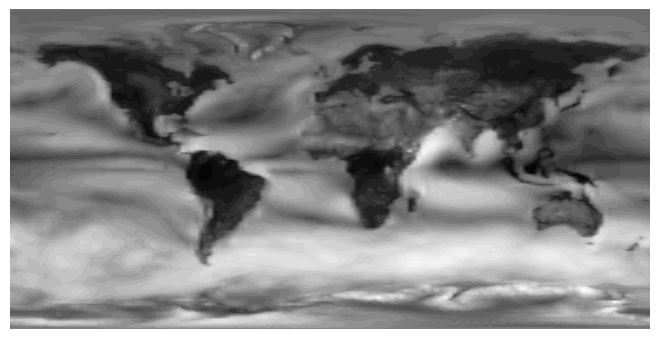

In [32]:
%matplotlib inline

from IPython.display import clear_output
import os
import time
from cartopy.util import add_cyclic_point

# Get the current time as a formatted string
timestamp = time.strftime("%Y%m%d_%H%M%S")

# Specify the name of the new directory with the timestamp
new_dir = "./output/" + timestamp

# Create the new directory
os.mkdir(new_dir)

cmap = mpl.colormaps["Greys_r"]

for filedef in files:
    data = Dataset(filedef["path"])

    climate_var = data.variables["sfcWind"][:]
    climate_var = climate_var[0:timesteps, start_lat:end_lat,start_lon:end_lon].flatten()


    lons = data.variables["lon"][start_lon:end_lon]
    lons = np.array(lons[:])


    lats = data.variables["lat"][:][start_lat:end_lat]

    climate_var = np.array(climate_var).reshape(timesteps,len(lats),len(lons) )


    dataFilled, lonsFilled = add_cyclic_point(climate_var, coord = lons)
    LONS, LATS = np.meshgrid(lonsFilled,lats)

    print(np.amin(dataFilled), np.amax(dataFilled))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.axis("off")

    plt.contourf(
        LONS,
        LATS,
        dataFilled[0],
        cmap = cmap,
        transform=ccrs.PlateCarree(),
        vmin = 0,
        vmax = 15,
        levels=20
    )
    plt.tight_layout()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    plt.savefig("{}/simulation-{}.jpg".format(new_dir,filedef["name"]), dpi=600)
    clear_output(wait = True)
    plt.pause(0.001)
